# SAMPLE STRATERGY TEST TO VISUALISE BACKTEST/BENCHMARK RETURNS 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Stock:
    def __init__(self, ticker):
        self.ticker = ticker

    def get_price(self):
        data = yf.download(self.ticker, start="2010-01-01", end="2023-04-10")
        benchmark = yf.download("^NSEI", start="2010-01-01", end="2023-04-10")
        return data, benchmark

In [3]:
def calculate_returns(data, benchmark):

    #the short-term and long-term moving averages
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data = data.dropna()
    #Signal based on the moving average crossovers
    data = data.copy()
    data['Signal'] = np.where(data['SMA_50'] > data['SMA_200'], 1, 0)
    data['Signal'] = data['Signal'].shift(1)
    #The returns of the strategy
    data['Strategy_Returns'] = data['Close'] / data['Close'].shift(1) - 1
    data['Strategy_Returns'] = data['Strategy_Returns'] * data['Signal'].shift(1)
    #The cumulative returns of the strategy
    data['Cumulative_Returns'] = (data['Strategy_Returns'] + 1).cumprod()
    #The benchmark returns
    benchmark['Benchmark_Returns'] = benchmark['Close'] / benchmark['Close'].shift(1) - 1
    return data, benchmark

In [8]:
def plot_returns(data, benchmark, title='Backtested Returns vs. Benchmark Returns', data_color='#f05053', benchmark_color='#007bff', bg_color='#212121'):
    plt.style.use('dark_background')
    plt.rcParams['figure.facecolor'] = bg_color
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(data.index, data['Cumulative_Returns'], color=data_color, linewidth=2, label='Backtested Returns')
    ax.plot(benchmark.index, (benchmark['Benchmark_Returns'] + 1).cumprod(), color=benchmark_color, linewidth=2, label='Benchmark Returns')
    ax.fill_between(data.index, data['Cumulative_Returns'], 0, alpha=0.5, color=data_color)
    ax.fill_between(benchmark.index, (benchmark['Benchmark_Returns'] + 1).cumprod(), 0, alpha=0.4, color=benchmark_color)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Cumulative Returns', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(linestyle='--', color='gray', alpha=0.8)
    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


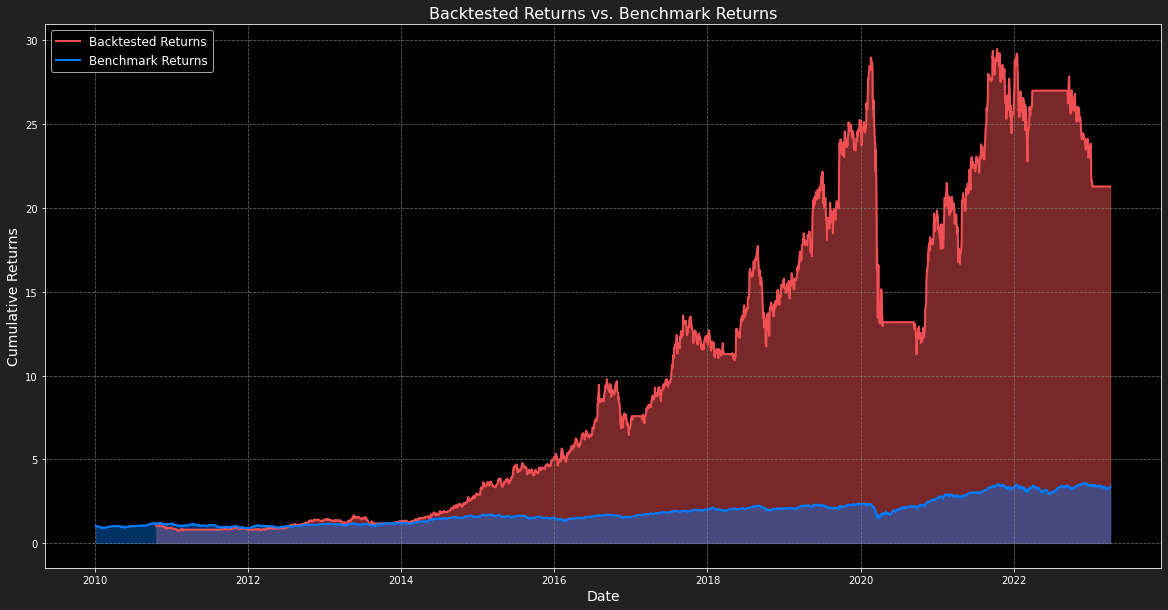

In [9]:
def main(ticker):
    stock = Stock(ticker)
    data, benchmark = stock.get_price()
    data, benchmark = calculate_returns(data, benchmark)
    plot_returns(data, benchmark)

if __name__ == '__main__':
    main("BAJFINANCE.NS")